In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import binom
from scipy import asarray as ar,exp

In [24]:
def random_walk(num_steps, x_start=0):
    a_steps = np.random.randint(2, size=num_steps)
    b_steps = a_steps * 2 - 1
    return x_start + np.cumsum(b_steps)

In [25]:
final_pos_size = 400
n = 1000
mu = 200
num_times = 1000

final_pos = np.zeros(final_pos_size)

for i in range(num_times):
    rw1 = random_walk(n, mu)
    final_pos[rw1[n-1]] += 1

Text(0, 0.5, 'P_n(x)')

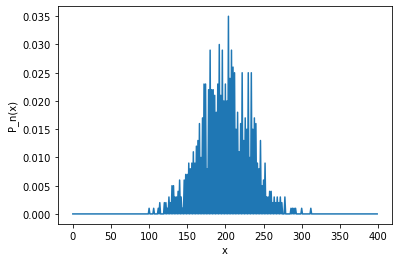

In [26]:
plt.plot(final_pos / num_times)
plt.xlabel('x')
plt.ylabel('P_n(x)')

Text(0, 0.5, 'P_n(x>m)')

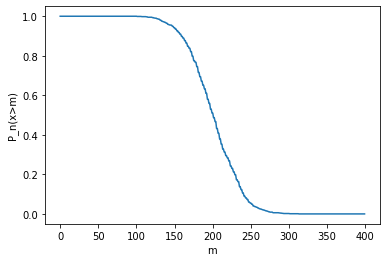

In [27]:
m_pos = np.zeros(final_pos_size)
for i in range(final_pos_size):
    m_pos[i] = np.sum(final_pos[i:]) / num_times

plt.plot(m_pos)
plt.xlabel('m')
plt.ylabel('P_n(x>m)')

Text(0, 0.5, 'P_n(x)')

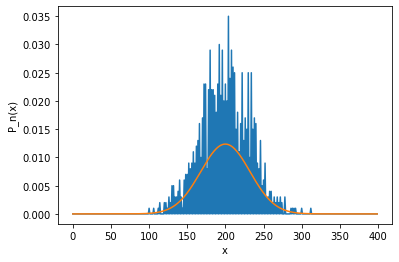

In [32]:
x_val = range(0, 400)
mean = sum(x_val * final_pos / num_times)
sigma = sum(final_pos*(x_val-mean)**2)/num_times

def objective(x, a, b): 
    y = 1/(a * np.sqrt(2 * np.pi) ) * np.exp((-1/2) * ((x-b)/a)**2)
    return y


# mean_sd, _ = curve_fit(objective , x_val,final_pos/num_times)

mean_sd, sdfg = curve_fit(objective , x_val,final_pos/num_times, p0=[mean,sigma])
sd,mean  = mean_sd
plt.plot(final_pos/num_times)
plt.plot(x_val, norm.pdf(x_val, mean, sd))
plt.xlabel('x')
plt.ylabel('P_n(x)')